In [1]:
#웹 스크래핑 가능 유무 확인을 위한 모듈 탑재
import requests

#웹 스크래핑 대상 주소 저장
url = 'https://finance.naver.com/item/sise_day.naver?code=086520&page=2'

#HTTP 요청을 대상 주소로 보내고, HTTP 응답 받아서 저장하기
page = requests.get(url)

#응답 내용 확인하기
print(page.text)


<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<meta http-equiv="Content-Type" content="text/html; charset=euc-kr">
<title>네이버 :: 세상의 모든 지식, 네이버</title>

<style type="text/css">
.error_content * {margin:0;padding:0;}
.error_content img{border:none;}
.error_content em {font-style:normal;}
.error_content {width:410px; margin:80px auto 0; padding:57px 0 0 0; font-size:12px; font-family:"나눔고딕", "NanumGothic", "돋움", Dotum, AppleGothic, Sans-serif; text-align:left; line-height:14px; background:url(https://ssl.pstatic.net/static/common/error/090610/bg_thumb.gif) no-repeat center top; white-space:nowrap;}
.error_content p{margin:0;}
.error_content .error_desc {margin-bottom:21px; overflow:hidden; text-align:center;}
.error_content .error_desc2 {margin-bottom:11px; padding-bottom:7px; color:#888; line-height:18px; border-bottom:1px solid #eee;}
.error_content .error_desc3 {clear:both; color:#888;}
.error_content .error_desc3

In [4]:
#헤더 정보 설정하기
my_headers = {'user-agent' : 'Mozilla/5.0'}

#요청 헤더 설정하여 HTTP 응답 받아오기
page = requests.get(url, headers=my_headers)

#응답 내용 확인하기
print(page.text)


<html lang="ko">
<head>
<meta http-equiv="Content-Type" content="text/html; charset=euc-kr">
<title>네이버 증권</title>

<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20230321170048/css/newstock.css">
<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20230321170048/css/common.css">
<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20230321170048/css/layout.css">
<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20230321170048/css/main.css">
<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20230321170048/css/newstock2.css">
<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20230321170048/css/newstock3.css">
<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20230321170048/css/world.css">
</head>
<body>
<script language="JavaS

In [5]:
#판다스 라이브러리 탑재
import pandas as pd

#HTML 페이지에서 테이블 추출
pages = pd.read_html(page.text)

#추출한 데이터 타입 확인하기
type(pages)

list

In [6]:
#페이지 개수 확인하기
len(pages)

2

In [8]:
#첫번째 테이블 내용 확인하기
pages[0]

,날짜,종가,전일비,시가,고가,저가,거래량
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023.03.22,453000.0,33000.0,435000.0,460000.0,428000.0,1581025.0
2,2023.03.21,420000.0,17000.0,403000.0,432500.0,391000.0,1494442.0
3,2023.03.20,403000.0,3500.0,367000.0,412500.0,347500.0,2668280.0
4,2023.03.17,399500.0,38500.0,445000.0,445500.0,392500.0,2509582.0
5,2023.03.16,438000.0,10000.0,462500.0,472500.0,427000.0,2114602.0
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2023.03.15,448000.0,77000.0,405000.0,454500.0,388500.0,3092531.0


In [9]:
#두번째 테이블 내용 확인하기
pages[1]

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,맨앞,1,2,3,4,5,6,7,8,9,10,다음,맨뒤


In [10]:
#페이지 번호를 제외한 주소 저장
new_url = 'https://finance.naver.com/item/sise_day.naver?code=086520&page='

#데이터를 축적할 데이터프레임 생성
all_tables = pd.DataFrame()

In [14]:
#페이지 번호 증가용 반복문
for page_number in range(1, 2):
    
    #페이지 번호 추가한 주소 완성
    full_url = new_url + str(page_number)
    #주소 확인하기
    print(f'{page_number} 번째 페이지 읽어오기({full_url})')
    
    #HTTP 요청 전송 후 응답 받아오기
    page = requests.get(full_url, headers=my_headers)
    #테이블 추출
    table = pd.read_html(page.text)[0]
    
    #수행할 내용 확인
    print(f'전체 {len(all_tables.index)} 줄에 {len(table.index)} 줄 추가')
    #데이터 축적용 데이터프레임 테이블 추가
    all_tables = pd.concat([all_tables, table])

1 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=086520&page=1)
전체 0 줄에 15 줄 추가


In [15]:
#전체 테이블 결과 확인
all_tables

,날짜,종가,전일비,시가,고가,저가,거래량
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023.04.05,515000.0,40000.0,473000.0,520000.0,472500.0,1558272.0
2,2023.04.04,475000.0,24500.0,496000.0,502000.0,474000.0,962290.0
3,2023.04.03,499500.0,1000.0,508000.0,518000.0,491000.0,1182262.0
4,2023.03.31,498500.0,0.0,483000.0,506000.0,481000.0,1229715.0
5,2023.03.30,498500.0,0.0,509000.0,531000.0,493000.0,1973661.0
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2023.03.29,498500.0,65000.0,431500.0,499000.0,423000.0,2754691.0


In [16]:
#결손치 제거
all_tables.dropna(inplace=True)

#데이터 확인하기
all_tables

,날짜,종가,전일비,시가,고가,저가,거래량
1,2023.04.05,515000.0,40000.0,473000.0,520000.0,472500.0,1558272.0
2,2023.04.04,475000.0,24500.0,496000.0,502000.0,474000.0,962290.0
3,2023.04.03,499500.0,1000.0,508000.0,518000.0,491000.0,1182262.0
4,2023.03.31,498500.0,0.0,483000.0,506000.0,481000.0,1229715.0
5,2023.03.30,498500.0,0.0,509000.0,531000.0,493000.0,1973661.0
9,2023.03.29,498500.0,65000.0,431500.0,499000.0,423000.0,2754691.0
10,2023.03.28,433500.0,5500.0,446000.0,449000.0,405500.0,1806881.0
11,2023.03.27,439000.0,17000.0,452000.0,461000.0,433500.0,1119319.0
12,2023.03.24,456000.0,1000.0,481000.0,481500.0,435000.0,1558971.0
13,2023.03.23,455000.0,2000.0,451500.0,495500.0,406500.0,2542467.0


In [14]:
#페이지 번호 증가용 반복문
for page_number in range(1, 11): #range(1,11) -> 10페이지 데이터 수집
    
    #페이지 번호 추가한 주소 완성
    full_url = new_url + str(page_number)
    #주소 확인하기
    print(f'{page_number} 번째 페이지 읽어오기({full_url})')
    
    #HTTP 요청 전송 후 응답 받아오기
    page = requests.get(full_url, headers=my_headers)
    #테이블 추출
    table = pd.read_html(page.text)[0]
    
    #수행할 내용 확인
    print(f'전체 {len(all_tables.index)} 줄에 {len(table.index)} 줄 추가')
    #데이터 축적용 데이터프레임 테이블 추가
    all_tables = pd.concat([all_tables, table])

1 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=361610&page=1)
전체 0 줄에 15 줄 추가
2 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=361610&page=2)
전체 15 줄에 15 줄 추가
3 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=361610&page=3)
전체 30 줄에 15 줄 추가
4 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=361610&page=4)
전체 45 줄에 15 줄 추가
5 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=361610&page=5)
전체 60 줄에 15 줄 추가
6 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=361610&page=6)
전체 75 줄에 15 줄 추가
7 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=361610&page=7)
전체 90 줄에 15 줄 추가
8 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=361610&page=8)
전체 105 줄에 15 줄 추가
9 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=361610&page=9)
전체 120 줄에 15 줄 추가
10 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=361610&page=10)
전체 135 줄에 15 줄 추가


In [18]:
all_tables.dropna(inplace=True)
all_tables

,날짜,종가,전일비,시가,고가,저가,거래량
1,2023.04.05,515000.0,40000.0,473000.0,520000.0,472500.0,1558272.0
2,2023.04.04,475000.0,24500.0,496000.0,502000.0,474000.0,962290.0
3,2023.04.03,499500.0,1000.0,508000.0,518000.0,491000.0,1182262.0
4,2023.03.31,498500.0,0.0,483000.0,506000.0,481000.0,1229715.0
5,2023.03.30,498500.0,0.0,509000.0,531000.0,493000.0,1973661.0
...,...,...,...,...,...,...,...
9,2022.11.17,126800.0,3100.0,129200.0,131300.0,126800.0,391377.0
10,2022.11.16,129900.0,3000.0,133200.0,133200.0,127900.0,534786.0
11,2022.11.15,132900.0,2200.0,136300.0,136300.0,130600.0,686239.0
12,2022.11.14,135100.0,1800.0,134600.0,137700.0,133600.0,743068.0


In [19]:
#열 이름 영문으로 변경
all_tables.rename(columns={'날짜' : 'date',
                           '종가' : 'end_price',
                           '시가' : 'start_price',
                           '고가' : 'highest_price',
                           '저가' : 'lowest_price'}
                 , inplace=True)
#데이터 확인하기
all_tables

,date,end_price,전일비,start_price,highest_price,lowest_price,거래량
1,2023.04.05,515000.0,40000.0,473000.0,520000.0,472500.0,1558272.0
2,2023.04.04,475000.0,24500.0,496000.0,502000.0,474000.0,962290.0
3,2023.04.03,499500.0,1000.0,508000.0,518000.0,491000.0,1182262.0
4,2023.03.31,498500.0,0.0,483000.0,506000.0,481000.0,1229715.0
5,2023.03.30,498500.0,0.0,509000.0,531000.0,493000.0,1973661.0
...,...,...,...,...,...,...,...
9,2022.11.17,126800.0,3100.0,129200.0,131300.0,126800.0,391377.0
10,2022.11.16,129900.0,3000.0,133200.0,133200.0,127900.0,534786.0
11,2022.11.15,132900.0,2200.0,136300.0,136300.0,130600.0,686239.0
12,2022.11.14,135100.0,1800.0,134600.0,137700.0,133600.0,743068.0


In [20]:
#필요 없는 열 제거
all_tables.drop(['전일비', '거래량'], axis=1, inplace=True)

#데이터 확인하기
all_tables

,date,end_price,start_price,highest_price,lowest_price
1,2023.04.05,515000.0,473000.0,520000.0,472500.0
2,2023.04.04,475000.0,496000.0,502000.0,474000.0
3,2023.04.03,499500.0,508000.0,518000.0,491000.0
4,2023.03.31,498500.0,483000.0,506000.0,481000.0
5,2023.03.30,498500.0,509000.0,531000.0,493000.0
...,...,...,...,...,...
9,2022.11.17,126800.0,129200.0,131300.0,126800.0
10,2022.11.16,129900.0,133200.0,133200.0,127900.0
11,2022.11.15,132900.0,136300.0,136300.0,130600.0
12,2022.11.14,135100.0,134600.0,137700.0,133600.0


In [93]:
#중앙값 열 추가
all_tables['midian_price'] = all_tables['highest_price'] 
                                - ((all_tables['highest_price'] 
                                    - all_tables['lowest_price']) / 2)

all_tables

IndentationError: unexpected indent (<ipython-input-93-67eb8a3bcfbd>, line 3)

In [82]:
#월 정보 열 추가
all_tables['month'] = all_tables['date'].str[0:7]

all_tables

KeyError: 'date'

In [81]:
#날짜를 색인으로 지정하기
all_tables.set_index('month', inplace=True)

#날짜 오른차순으로 정렬하기
all_tables.sort_index(inplace=True)

#값 확인하기
all_tables

KeyError: "None of ['month'] are in the columns"

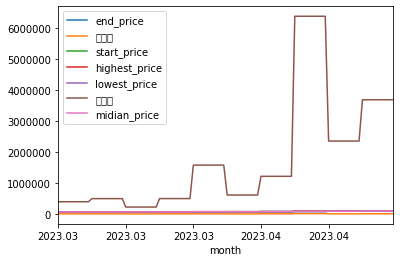

In [78]:
#전체 숫자 데이터 선 그래프 그리기
all_tables.plot.line()

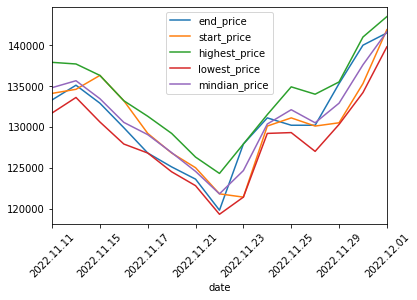

In [28]:
#앞 15일치데이터 선 그래프로 그리기
all_tables[:15].plot.line(rot=45)

KeyError: 'Column not found: mindian_price'

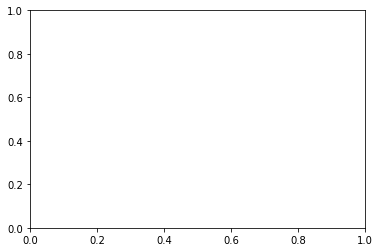

In [75]:
#일일 시세 중앙값의 상자 수염 그래프 그리기
all_tables.boxplot(column=['mindian_price'], by=['month'])

In [1]:
import requests

url = 'https://finance.naver.com/item/sise_day.naver?code=361610&page=2'

page = requests.get(url)

print(page.text)


<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<meta http-equiv="Content-Type" content="text/html; charset=euc-kr">
<title>네이버 :: 세상의 모든 지식, 네이버</title>

<style type="text/css">
.error_content * {margin:0;padding:0;}
.error_content img{border:none;}
.error_content em {font-style:normal;}
.error_content {width:410px; margin:80px auto 0; padding:57px 0 0 0; font-size:12px; font-family:"나눔고딕", "NanumGothic", "돋움", Dotum, AppleGothic, Sans-serif; text-align:left; line-height:14px; background:url(https://ssl.pstatic.net/static/common/error/090610/bg_thumb.gif) no-repeat center top; white-space:nowrap;}
.error_content p{margin:0;}
.error_content .error_desc {margin-bottom:21px; overflow:hidden; text-align:center;}
.error_content .error_desc2 {margin-bottom:11px; padding-bottom:7px; color:#888; line-height:18px; border-bottom:1px solid #eee;}
.error_content .error_desc3 {clear:both; color:#888;}
.error_content .error_desc3

In [3]:
my_headers = {'user-agent' : 'Mozilla/5.0'}

page = requests.get(url, headers=my_headers)

print(page.text)


<html lang="ko">
<head>
<meta http-equiv="Content-Type" content="text/html; charset=euc-kr">
<title>네이버 증권</title>

<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20230321170048/css/newstock.css">
<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20230321170048/css/common.css">
<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20230321170048/css/layout.css">
<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20230321170048/css/main.css">
<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20230321170048/css/newstock2.css">
<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20230321170048/css/newstock3.css">
<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20230321170048/css/world.css">
</head>
<body>
<script language="JavaS

In [5]:
import pandas as pd

pages = pd.read_html(page.text)

type(pages)

list

In [6]:
pages[0]

,날짜,종가,전일비,시가,고가,저가,거래량
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023.03.23,65800.0,1400.0,63900.0,67000.0,63600.0,702933.0
2,2023.03.22,64400.0,2500.0,63000.0,64400.0,62500.0,405744.0
3,2023.03.21,61900.0,100.0,61900.0,62800.0,61600.0,171581.0
4,2023.03.20,61800.0,100.0,61000.0,62200.0,60900.0,238713.0
5,2023.03.17,61700.0,300.0,62300.0,62900.0,60800.0,236516.0
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2023.03.16,61400.0,600.0,61700.0,61900.0,59800.0,270670.0


In [7]:
pages[1]

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,맨앞,1,2,3,4,5,6,7,8,9,10,다음,맨뒤


In [8]:
new_url = 'https://finance.naver.com/item/sise_day.naver?code=361610&page='

all_tables = pd.DataFrame()

In [15]:
for page_number in range(1,2):
    
    full_url = new_url + str(page_number)
    
    print(f'{page_number} 번째 페이지 읽어오기({full_url})')
    
    page = requests.get(full_url, headers=my_headers)
    
    table = pd.read_html(page.text)[0]
    
    print(f'전체 {len(all_tables.index)} 줄에 {len(table.index)} 줄 추가')
    
    all_tables = pd.concat([all_tables, table])

1 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=361610&page=1)
전체 150 줄에 15 줄 추가


In [16]:
all_tables

,날짜,종가,전일비,시가,고가,저가,거래량
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023.04.06,92800.0,5600.0,88500.0,94800.0,88100.0,3686584.0
2,2023.04.05,87200.0,1600.0,87900.0,89500.0,85600.0,2353695.0
3,2023.04.04,85600.0,9700.0,77600.0,90700.0,77100.0,6384271.0
4,2023.04.03,75900.0,4700.0,72800.0,76400.0,72300.0,1214291.0
...,...,...,...,...,...,...,...
10,2023.03.29,68400.0,1800.0,66500.0,69800.0,66000.0,495603.0
11,2023.03.28,66600.0,300.0,66500.0,67200.0,65300.0,222023.0
12,2023.03.27,66300.0,1300.0,65200.0,68000.0,65100.0,494219.0
13,2023.03.24,65000.0,800.0,66500.0,66600.0,63700.0,393269.0


In [17]:
all_tables.dropna(inplace=True)

all_tables

,날짜,종가,전일비,시가,고가,저가,거래량
1,2023.04.06,92800.0,5600.0,88500.0,94800.0,88100.0,3686584.0
2,2023.04.05,87200.0,1600.0,87900.0,89500.0,85600.0,2353695.0
3,2023.04.04,85600.0,9700.0,77600.0,90700.0,77100.0,6384271.0
4,2023.04.03,75900.0,4700.0,72800.0,76400.0,72300.0,1214291.0
5,2023.03.31,71200.0,300.0,71800.0,72800.0,70400.0,610764.0
...,...,...,...,...,...,...,...
9,2023.03.30,71500.0,3100.0,69200.0,73000.0,67500.0,1576435.0
10,2023.03.29,68400.0,1800.0,66500.0,69800.0,66000.0,495603.0
11,2023.03.28,66600.0,300.0,66500.0,67200.0,65300.0,222023.0
12,2023.03.27,66300.0,1300.0,65200.0,68000.0,65100.0,494219.0


In [49]:
all_tables = pd.DataFrame()

for page_number in range(1, 11):
    
    full_url = new_url + str(page_number)
    
    print(f'{page_number} 번째 페이지 읽어보기({full_url})')
    
    page = requests.get(full_url, headers=my_headers)
    
    tables = pd.read_html(page.text)[0]
    
    print(f'전체 {len(all_tables.index)} 줄에 {len(tables.index)} 줄 추가')
    
    all_tables = pd.concat([all_tables, table])

1 번째 페이지 읽어보기(https://finance.naver.com/item/sise_day.naver?code=361610&page=1)
전체 0 줄에 15 줄 추가
2 번째 페이지 읽어보기(https://finance.naver.com/item/sise_day.naver?code=361610&page=2)
전체 15 줄에 15 줄 추가
3 번째 페이지 읽어보기(https://finance.naver.com/item/sise_day.naver?code=361610&page=3)
전체 30 줄에 15 줄 추가
4 번째 페이지 읽어보기(https://finance.naver.com/item/sise_day.naver?code=361610&page=4)
전체 45 줄에 15 줄 추가
5 번째 페이지 읽어보기(https://finance.naver.com/item/sise_day.naver?code=361610&page=5)
전체 60 줄에 15 줄 추가
6 번째 페이지 읽어보기(https://finance.naver.com/item/sise_day.naver?code=361610&page=6)
전체 75 줄에 15 줄 추가
7 번째 페이지 읽어보기(https://finance.naver.com/item/sise_day.naver?code=361610&page=7)
전체 90 줄에 15 줄 추가
8 번째 페이지 읽어보기(https://finance.naver.com/item/sise_day.naver?code=361610&page=8)
전체 105 줄에 15 줄 추가
9 번째 페이지 읽어보기(https://finance.naver.com/item/sise_day.naver?code=361610&page=9)
전체 120 줄에 15 줄 추가
10 번째 페이지 읽어보기(https://finance.naver.com/item/sise_day.naver?code=361610&page=10)
전체 135 줄에 15 줄 추가


In [50]:
all_tables.dropna(inplace=True)

all_tables

,날짜,종가,전일비,시가,고가,저가,거래량
1,2023.04.06,92800.0,5600.0,88500.0,94800.0,88100.0,3686584.0
2,2023.04.05,87200.0,1600.0,87900.0,89500.0,85600.0,2353695.0
3,2023.04.04,85600.0,9700.0,77600.0,90700.0,77100.0,6384271.0
4,2023.04.03,75900.0,4700.0,72800.0,76400.0,72300.0,1214291.0
5,2023.03.31,71200.0,300.0,71800.0,72800.0,70400.0,610764.0
...,...,...,...,...,...,...,...
9,2023.03.30,71500.0,3100.0,69200.0,73000.0,67500.0,1576435.0
10,2023.03.29,68400.0,1800.0,66500.0,69800.0,66000.0,495603.0
11,2023.03.28,66600.0,300.0,66500.0,67200.0,65300.0,222023.0
12,2023.03.27,66300.0,1300.0,65200.0,68000.0,65100.0,494219.0


In [51]:
all_tables.rename(columns={'날짜' : 'date', 
                          '종가' : 'end_price',
                          '시가' : 'start_price',
                          '고가' : 'highest_price',
                          '저가' : 'lowest_price'}
                 , inplace=True)
all_tables

,date,end_price,전일비,start_price,highest_price,lowest_price,거래량
1,2023.04.06,92800.0,5600.0,88500.0,94800.0,88100.0,3686584.0
2,2023.04.05,87200.0,1600.0,87900.0,89500.0,85600.0,2353695.0
3,2023.04.04,85600.0,9700.0,77600.0,90700.0,77100.0,6384271.0
4,2023.04.03,75900.0,4700.0,72800.0,76400.0,72300.0,1214291.0
5,2023.03.31,71200.0,300.0,71800.0,72800.0,70400.0,610764.0
...,...,...,...,...,...,...,...
9,2023.03.30,71500.0,3100.0,69200.0,73000.0,67500.0,1576435.0
10,2023.03.29,68400.0,1800.0,66500.0,69800.0,66000.0,495603.0
11,2023.03.28,66600.0,300.0,66500.0,67200.0,65300.0,222023.0
12,2023.03.27,66300.0,1300.0,65200.0,68000.0,65100.0,494219.0


In [52]:
all_tables

,date,end_price,전일비,start_price,highest_price,lowest_price,거래량
1,2023.04.06,92800.0,5600.0,88500.0,94800.0,88100.0,3686584.0
2,2023.04.05,87200.0,1600.0,87900.0,89500.0,85600.0,2353695.0
3,2023.04.04,85600.0,9700.0,77600.0,90700.0,77100.0,6384271.0
4,2023.04.03,75900.0,4700.0,72800.0,76400.0,72300.0,1214291.0
5,2023.03.31,71200.0,300.0,71800.0,72800.0,70400.0,610764.0
...,...,...,...,...,...,...,...
9,2023.03.30,71500.0,3100.0,69200.0,73000.0,67500.0,1576435.0
10,2023.03.29,68400.0,1800.0,66500.0,69800.0,66000.0,495603.0
11,2023.03.28,66600.0,300.0,66500.0,67200.0,65300.0,222023.0
12,2023.03.27,66300.0,1300.0,65200.0,68000.0,65100.0,494219.0


In [95]:
#중앙값 열 추가
all_tables['midian_price'] = all_tables['highest_price'] -((all_tables
                            ['highest_price'] - all_tables['lowest_price'])/2)

all_tables                                       

,end_price,전일비,start_price,highest_price,lowest_price,거래량,midian_price
month,,,,,,,
2023.03,65000.0,800.0,66500.0,66600.0,63700.0,393269.0,65150.0
2023.03,65000.0,800.0,66500.0,66600.0,63700.0,393269.0,65150.0
2023.03,65000.0,800.0,66500.0,66600.0,63700.0,393269.0,65150.0
2023.03,65000.0,800.0,66500.0,66600.0,63700.0,393269.0,65150.0
2023.03,65000.0,800.0,66500.0,66600.0,63700.0,393269.0,65150.0
...,...,...,...,...,...,...,...
2023.04,92800.0,5600.0,88500.0,94800.0,88100.0,3686584.0,91450.0
2023.04,92800.0,5600.0,88500.0,94800.0,88100.0,3686584.0,91450.0
2023.04,92800.0,5600.0,88500.0,94800.0,88100.0,3686584.0,91450.0


In [102]:
all_tables['month'] = all_tables['date'].str[0:7]

all_tables

KeyError: 'date'

In [96]:
all_tables.set_index('date', inplace=True)

all_tables.sort_index(inplace=True)

all_tables

KeyError: "None of ['date'] are in the columns"

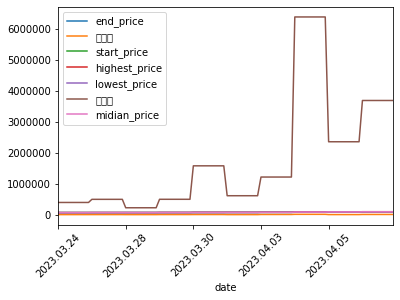

In [60]:
all_tables[:100].plot.line(rot=45)

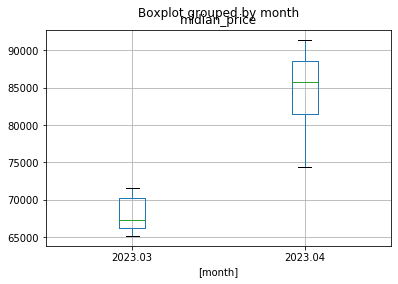

In [57]:
all_tables[:100].boxplot(column=['midian_price'], by=['month'])

In [103]:
all_tables[:365].boxplot(column=['midian_price'], by=['date'])

KeyError: 'date'